OASIS INFOBYTE INTERNSHIP

**TASK:2 UNEMPLOYMENT ANALYSIS WITH PYTHON**

BY:Anushka  Gunjal  |  Email: anushkagunjal10@gmail.com 

# **Import Libraries**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Load The Dataset**

In [77]:
df= pd.read_csv("Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Fix column names: Strip spaces and replace multiple spaces with underscores
df.columns = df.columns.str.strip().str.replace(r"\s+", "_", regex=True)

In [79]:
df.head()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [80]:
df.tail()

,Region,Date,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.describe()

,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated_Unemployment_Rate_(%)          740 non-null    float64
 4   Estimated_Employed                       740 non-null    float64
 5   Estimated_Labour_Participation_Rate_(%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [83]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated_Unemployment_Rate_(%)            float64
Estimated_Employed                         float64
Estimated_Labour_Participation_Rate_(%)    float64
Area                                        object
dtype: object

In [84]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

# **Data Cleaning**

In [85]:
df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated_Unemployment_Rate_(%)            28
Estimated_Employed                         28
Estimated_Labour_Participation_Rate_(%)    28
Area                                       28
dtype: int64

In [86]:
df.dropna(inplace=True)  # Remove missing values

In [87]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated_Unemployment_Rate_(%)            0
Estimated_Employed                         0
Estimated_Labour_Participation_Rate_(%)    0
Area                                       0
dtype: int64

In [88]:
df.duplicated().sum()

0

In [89]:
df.drop_duplicates(inplace=True)  # Remove duplicate rows

Convert 'Date' to DateTime Format

In [90]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime format

C:\Users\Anushka Gunjal\AppData\Local\Temp\ipykernel_1724\3956884639.py:1: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Drop Unnecessary 'Frequency' Column

In [91]:
df.drop(columns=['Frequency'], inplace=True)  # Drop the Frequency column if redundant
df

,Region,Date,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban


# **Data Interpretation**

In [92]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

Highest Unemployment Rate State in India

In [93]:
# Calculate the region with the highest unemployment rate
highest_unemployment_state = df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].sum().idxmax()
print(f"The region with the highest unemployment rate is {highest_unemployment_state}")

The region with the highest unemployment rate is Tripura


Highest Estimated Labour Participation Rate State Wise

In [94]:
highest_participation_rate = df.groupby('Region')['Estimated_Labour_Participation_Rate_(%)'].sum().idxmax()
print(f"The region with the highest labour participation rate is {highest_participation_rate}")

The region with the highest labour participation rate is Tripura


Lowest Unemployment Rate State in India

In [95]:
lowest_unemployment_state = df.groupby('Region')['Estimated_Unemployment_Rate_(%)'].sum().idxmin()
print(f"The region with the lowest unemployment rate is {lowest_unemployment_state}")

The region with the lowest unemployment rate is Sikkim


Highest Unemployment Rate Area in India

In [96]:
df['Area'].value_counts().idxmax()

'Urban'

Lowest Unemployment Rate Area in India

In [97]:
df['Area'].value_counts().idxmin()

'Rural'

# **Data Visualization**

## **Box Plot**

C:\Users\Anushka Gunjal\AppData\Local\Temp\ipykernel_1724\953278679.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




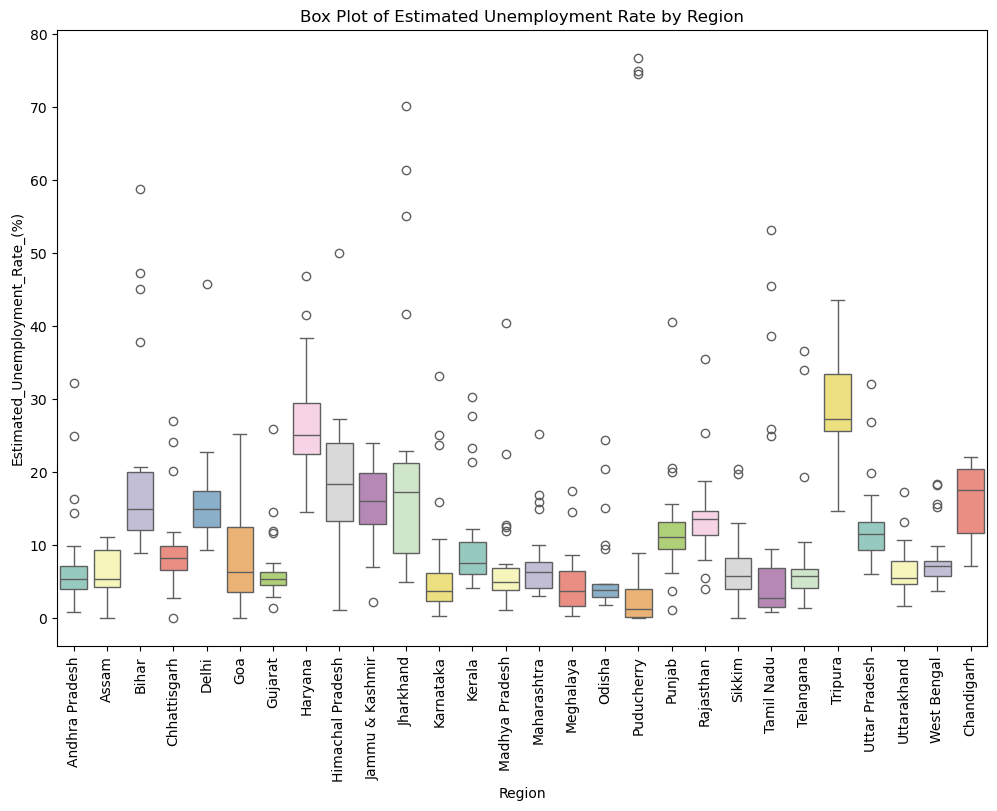

In [98]:
sns.boxplot(x='Region', y='Estimated_Unemployment_Rate_(%)', data=df, palette="Set3")
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.gcf().set_size_inches(12, 8)
plt.xticks(rotation=90)
plt.show()

Outlier


## **Histogram**

In [99]:
data1 = df[['Region','Estimated_Unemployment_Rate_(%)']].groupby('Region').sum().sort_values(by='Estimated_Unemployment_Rate_(%)',ascending=False)
data1.head(15)

,Estimated_Unemployment_Rate_(%)
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


In [100]:
plot = px.bar(data1, x=data1.index, y="Estimated_Unemployment_Rate_(%)", title = 'Top 15 States with Highest Unemployment Rate',color=data1.index) 
plot.show()

In [101]:
data2 = df[['Area', 'Estimated_Unemployment_Rate_(%)']].groupby('Area').sum().sort_values(by='Estimated_Unemployment_Rate_(%)', ascending=False)
plot_area = px.bar(data2, x=data2.index, y="Estimated_Unemployment_Rate_(%)", title='Unemployment Rate by Area', color=data2.index)
plot_area.show()

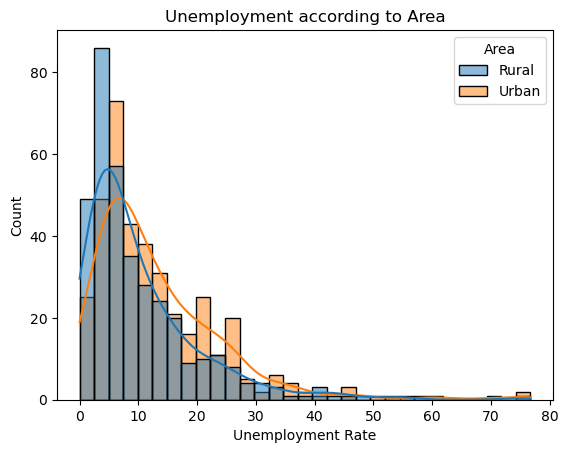

In [102]:
#fig = plt.figure(figsize = (10, 10))
sns.histplot(x='Estimated_Unemployment_Rate_(%)', data=df, kde=True, hue='Area')
plt.title('Unemployment according to Area')
plt.xlabel('Unemployment Rate')
plt.show()

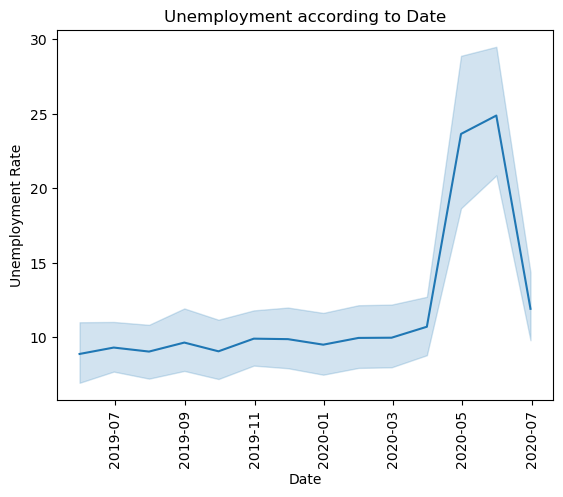

In [103]:
#fig = plt.figure(figsize = (5, 5))
sns.lineplot(y='Estimated_Unemployment_Rate_(%)', x='Date', data=df)
plt.title('Unemployment according to Date')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Unemployment Rate')
plt.show()

Area Wise Analysis

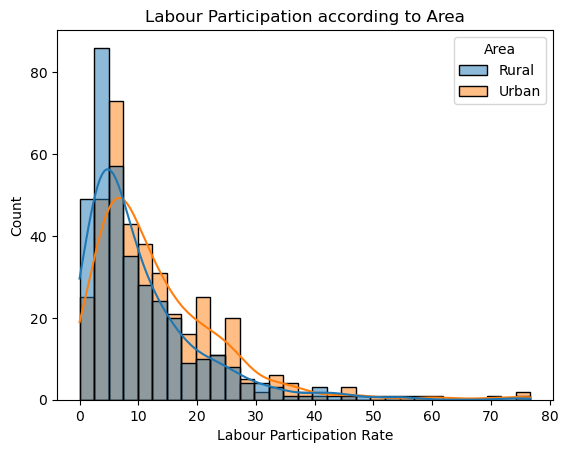

In [104]:
#fig = plt.figure(figsize = (30, 15))
sns.histplot(x='Estimated_Unemployment_Rate_(%)', data=df, kde=True, hue='Area')
plt.title('Labour Participation according to Area')
plt.xlabel('Labour Participation Rate')
plt.show()

Date Wise Analysis

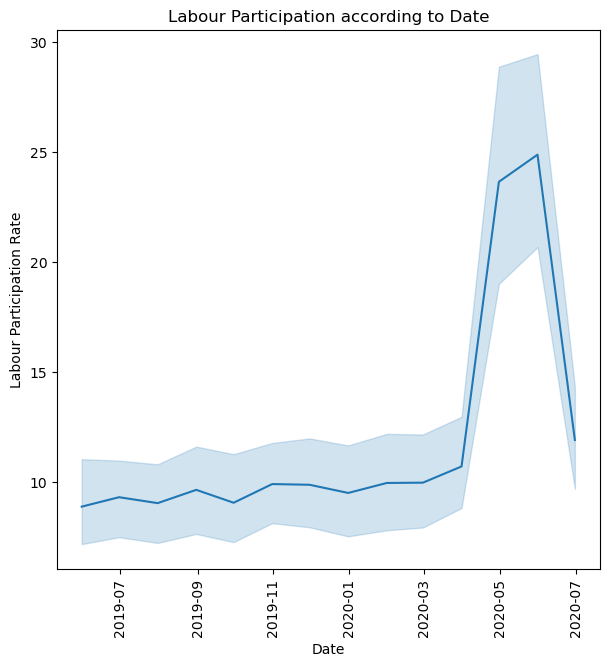

In [105]:
fig = plt.figure(figsize = (7, 7))
sns.lineplot(y='Estimated_Unemployment_Rate_(%)', x='Date', data=df)
plt.title('Labour Participation according to Date')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Labour Participation Rate')
plt.show()

Labour Participation Rate wise analysis


In [106]:
fg = px.bar(df, x='Region', y='Estimated_Labour_Participation_Rate_(%)', color='Region', 
            title='Labour Participation Rate (State-wise) by bar graph', template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

## **Pie Chart**

In [107]:
fig_region = px.pie(df, names='Region', title='Unemployment Rate Distribution by Region')
fig_region.show()

In [108]:
fig = px.pie(df, names='Area', title='Unemployment Rate Distribution by Area')
fig.show()

## **Pair Plot**

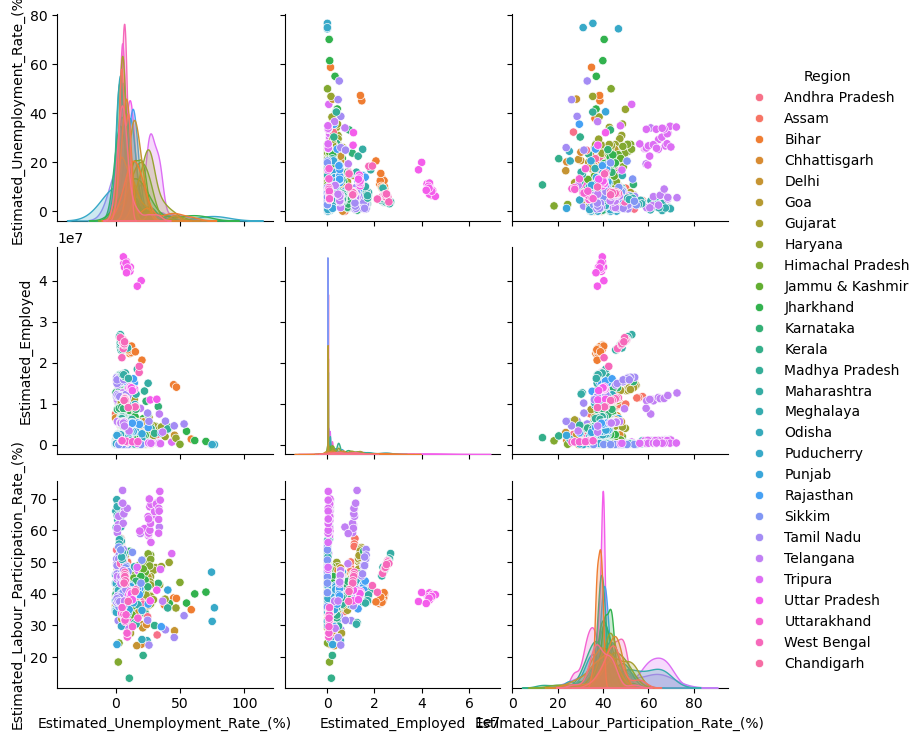

In [109]:
sns.pairplot(df, hue='Region')
plt.show()

Area Pair Plot

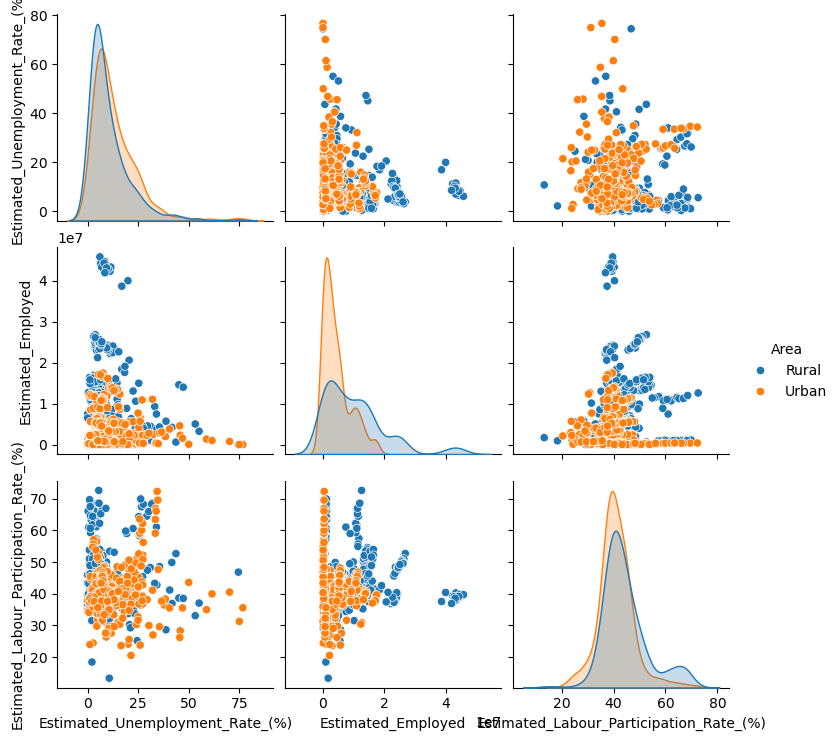

In [110]:
sns.pairplot(df, hue='Area')
plt.show()

# **Correlation Matrix**

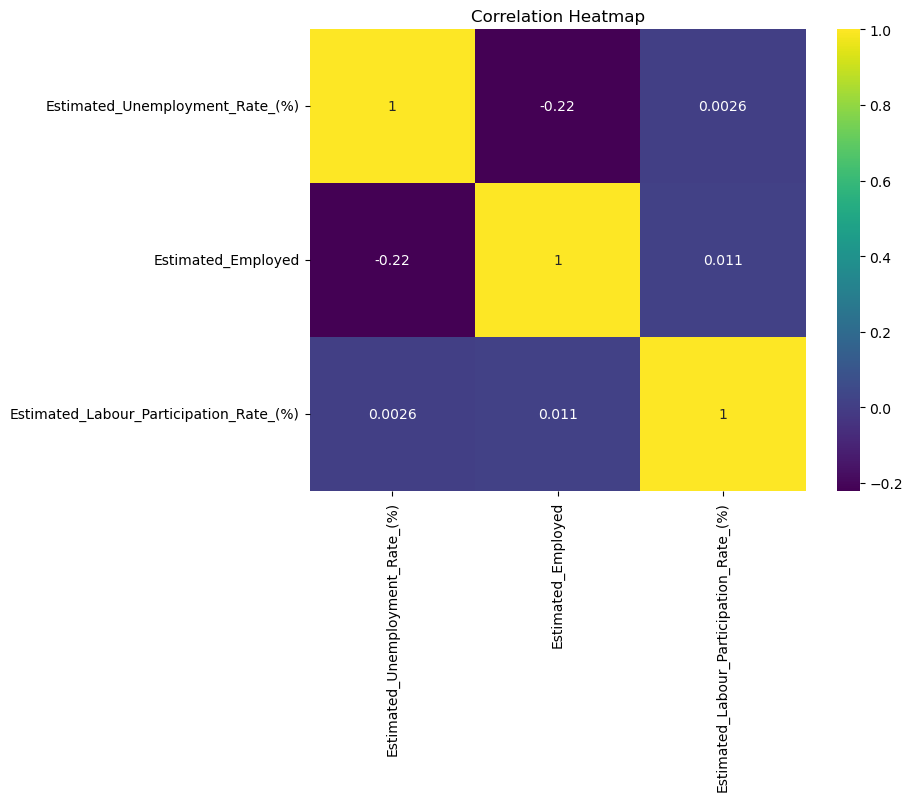

In [111]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Compute correlation and plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()


# **Sunburst Chart for Region-wise Analysis**

In [112]:
fig_sunburst = px.sunburst(df, path=['Region', 'Area'], values='Estimated_Unemployment_Rate_(%)', 
                           title='Sunburst Chart of Unemployment Rate by Region and Area')
fig_sunburst.show()

# **Final Insights & Conclusion**

1. **Highest and Lowest Unemployment Rates by Region:**
    - The region with the highest unemployment rate is **Tripura**.
    - The region with the lowest unemployment rate is **Sikkim**.

2. **Unemployment Rate by Area:**
    - Urban areas have a higher total estimated unemployment rate compared to rural areas.

3. **Unemployment Trends Over Time:**
    - The unemployment rate shows significant fluctuations over time, indicating varying economic conditions.

4. **Labour Participation Rate:**
    - The labour participation rate also varies significantly across different regions and areas.

5. **Correlation Analysis:**
    - There is a notable correlation between the unemployment rate and other economic indicators such as the estimated number of employed individuals and the labour participation rate.

6. **Visual Insights:**
    - The bar charts, pie charts, and sunburst charts provide a clear visual representation of the unemployment distribution across different regions and areas.
    - The heatmap highlights the correlation between different numeric variables in the dataset.

Overall, the analysis provides a comprehensive overview of the unemployment situation in India, highlighting key areas of concern and trends over time. This information can be valuable for policymakers and researchers to address unemployment issues effectively.